https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem/notebook

In [68]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [69]:
warnings.filterwarnings("ignore")
matplotlib.style.use('ggplot')

In [70]:
df = pd.read_csv("./heart.csv")
df.head()
df.shape

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(918, 12)

In [71]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [72]:
obj_cols = df.select_dtypes('object').columns
df[obj_cols] = df[obj_cols].astype('string')
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [74]:
corr = df.select_dtypes(exclude=['string']).corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


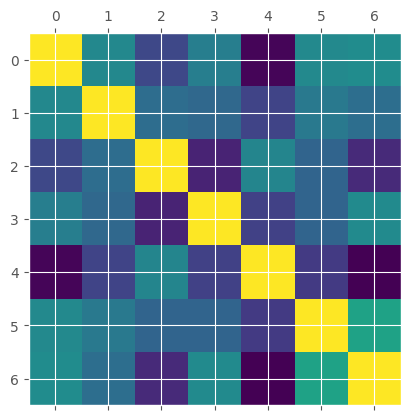

In [75]:
plt.matshow(corr)

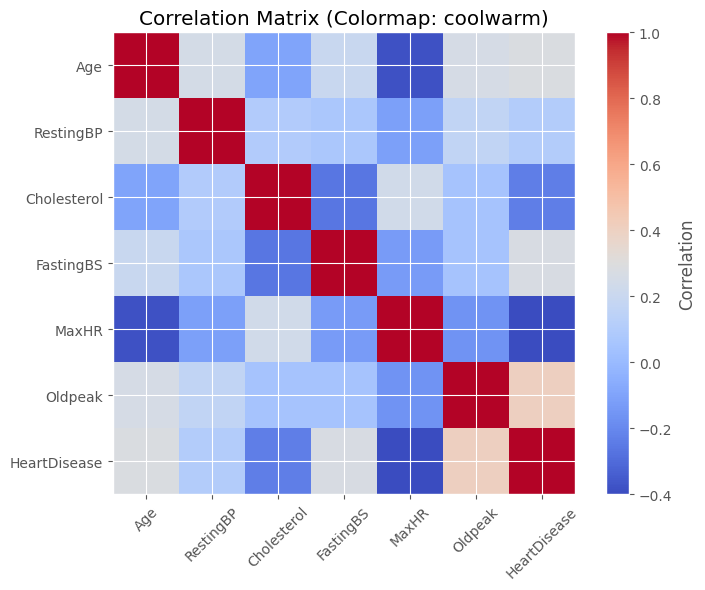

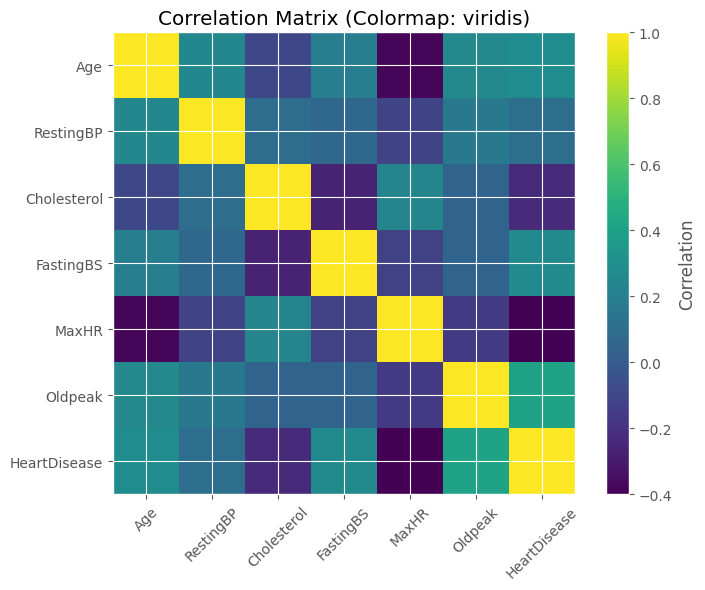

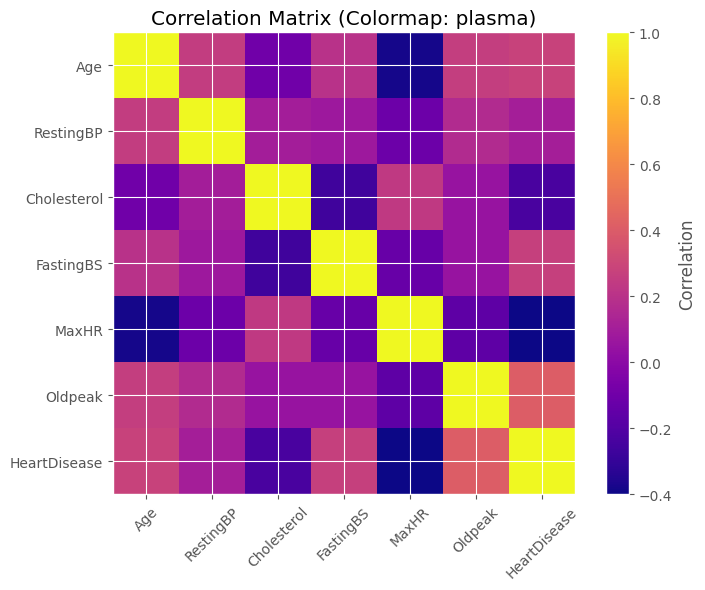

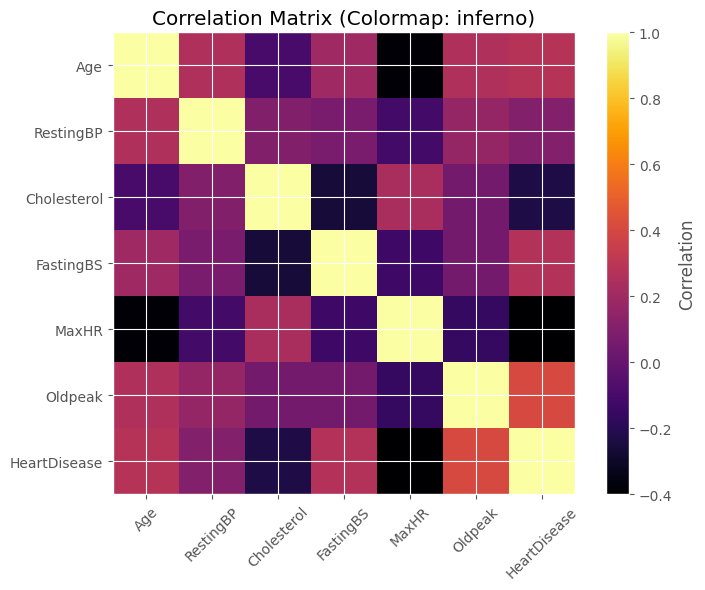

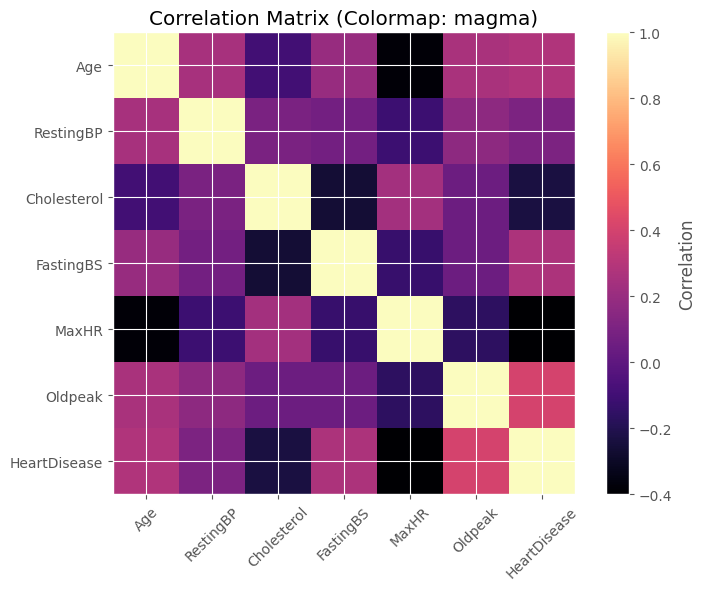

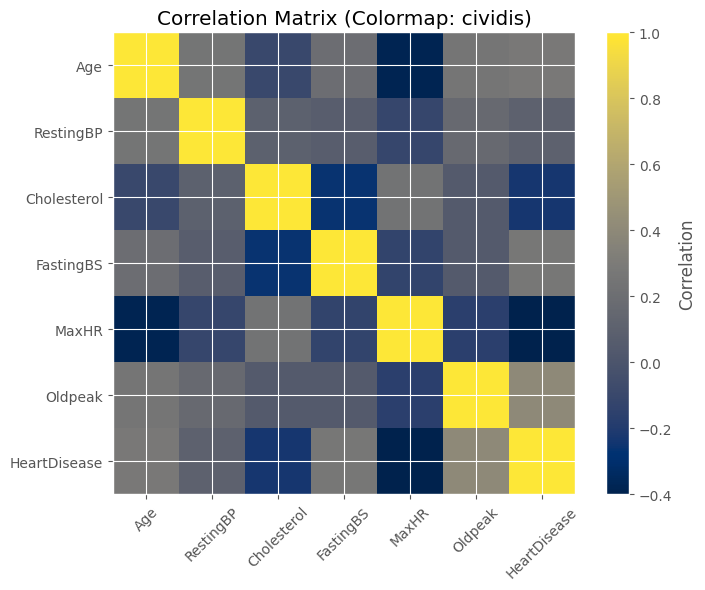

In [76]:
# _ = plt.figure(figsize=(8, 6))
# _ = plt.imshow(corr, cmap='inferno', interpolation='nearest')
# _ = plt.colorbar(label='Correlation')
# _ = plt.title('Correlation Matrix')
# _ = plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
# _ = plt.yticks(range(len(corr.columns)), corr.columns)

# Plot correlation matrix with different colormaps
cmaps = ['coolwarm', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']
for cmap in cmaps:
  _ = plt.figure(figsize=(8, 6))
  _ = plt.imshow(corr, cmap=cmap, interpolation='nearest')
  _ = plt.colorbar(label='Correlation')
  _ = plt.title(f'Correlation Matrix (Colormap: {cmap})')
  _ = plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
  _ = plt.yticks(range(len(corr.columns)), corr.columns)
  _ = plt.show()

<Axes: >

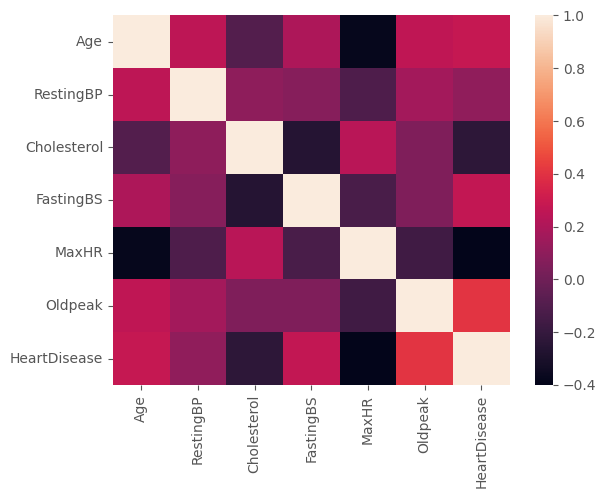

In [77]:
sns.heatmap(corr)

In [78]:
px.imshow(corr)

In [79]:
# Convert correlation matrix to absolute values
abs_corr = corr.abs()

# Iterate over the absolute correlation matrix
threshold = 0.2

# autopep8: off
print(f'Correlation values greater than {threshold} or less than -{threshold}:')
for i in range(len(abs_corr.columns)):
  for j in range(i+1, len(abs_corr.columns)):
    if abs_corr.iloc[i, j] > threshold or abs_corr.iloc[i, j] < -threshold:
      print(f"{abs_corr.index[i]} - {abs_corr.columns[j]}: {corr.iloc[i, j]:.2f}")

Correlation values greater than 0.2 or less than -0.2:
Age - RestingBP: 0.25
Age - MaxHR: -0.38
Age - Oldpeak: 0.26
Age - HeartDisease: 0.28
Cholesterol - FastingBS: -0.26
Cholesterol - MaxHR: 0.24
Cholesterol - HeartDisease: -0.23
FastingBS - HeartDisease: 0.27
MaxHR - HeartDisease: -0.40
Oldpeak - HeartDisease: 0.40


In [80]:
corr_heart_disease = corr['HeartDisease']
corr_heart_disease[corr_heart_disease.abs() > 0.1]

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [81]:
px.histogram(df, x='HeartDisease', color='Sex', title="Distribution of Heart Diseases",
             hover_data=df.columns, barmode='group')

In [82]:
px.histogram(df, x='ChestPainType', color='Sex',
             hover_data=df.columns, title="Types of Chest Pain")

In [83]:
px.histogram(df, x="Sex", hover_data=df.columns,
             title="Sex Ratio in the Data")

In [84]:
px.histogram(df, x="RestingECG", hover_data=df.columns,
             title="Distribution of Resting ECG")

<Figure size 6000x4000 with 0 Axes>

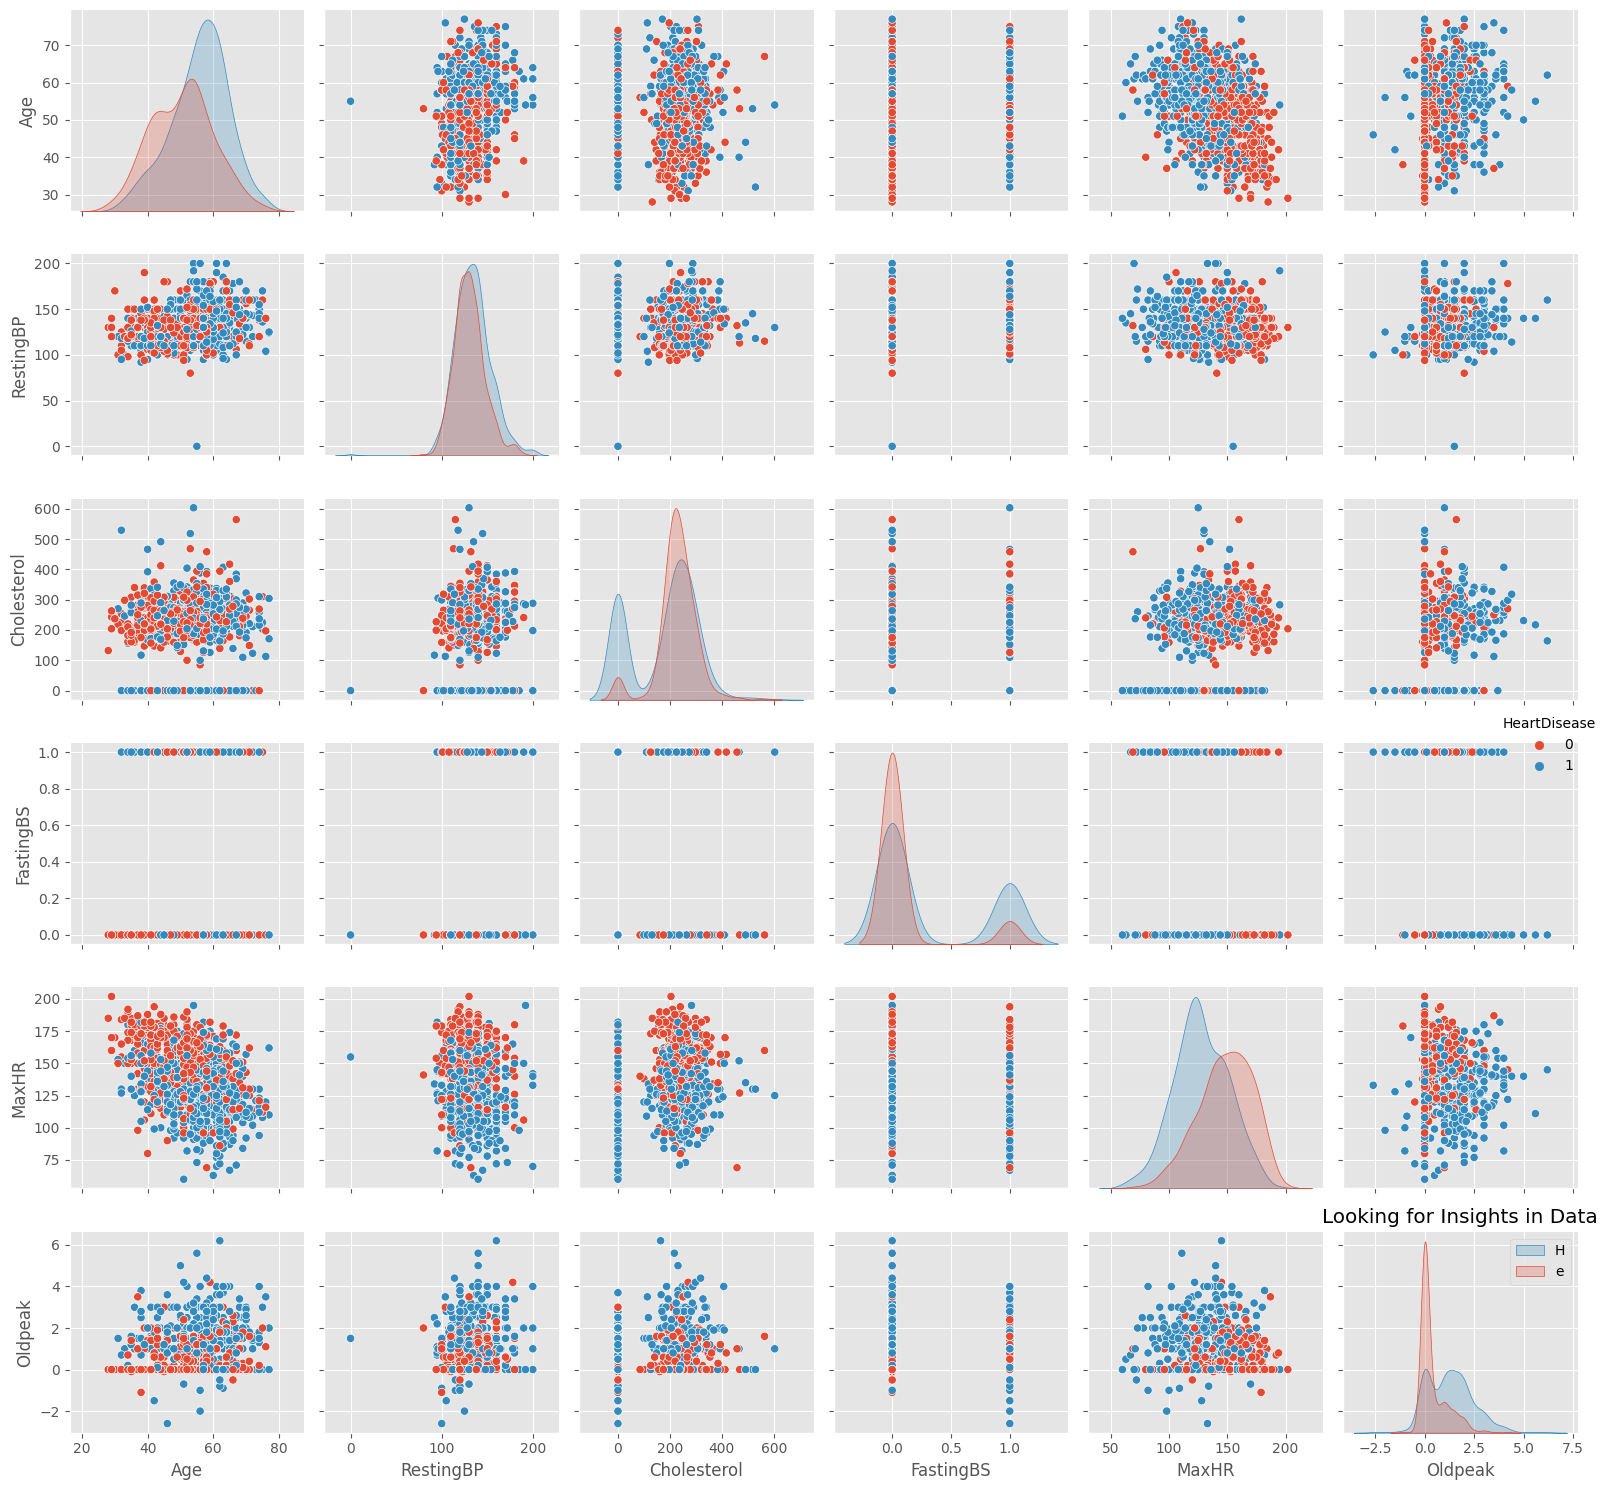

In [85]:
_ = plt.figure(figsize=(60, 40))
_ = sns.pairplot(df, hue="HeartDisease")
_ = plt.title("Looking for Insights in Data")
_ = plt.legend("HeartDisease")
_ = plt.tight_layout()
_ = plt.plot()

<Figure size 1500x1000 with 0 Axes>

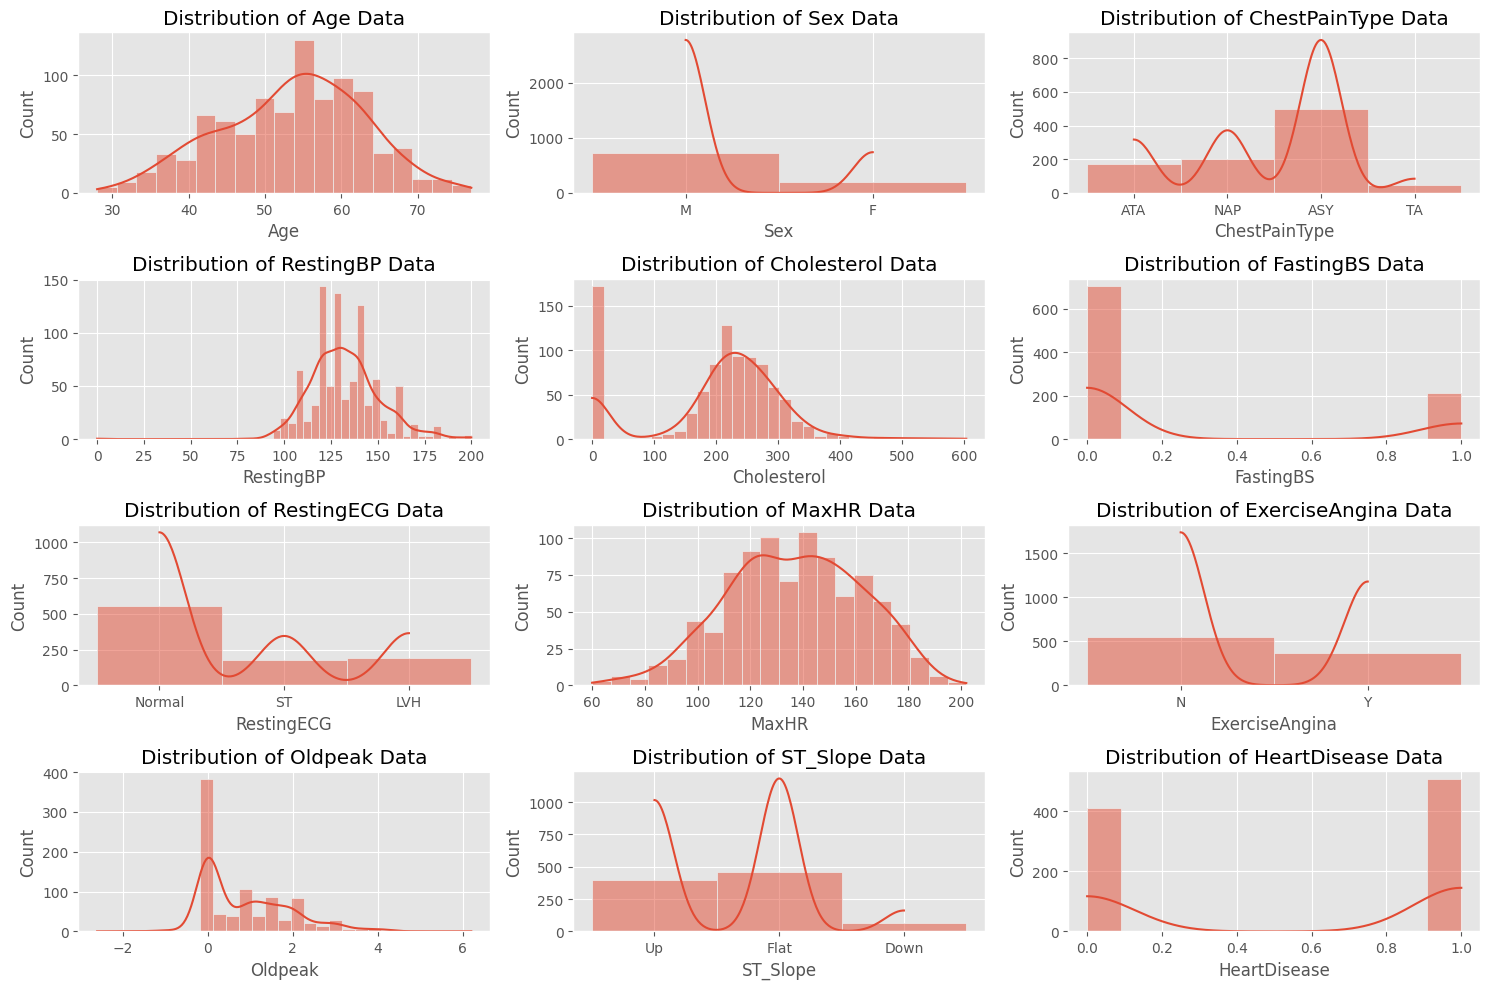

In [86]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
  _ = plt.subplot(4, 3, i)
  _ = plt.title(f"Distribution of {col} Data")
  _ = sns.histplot(df[col], kde=True)
  _ = plt.tight_layout()
  _ = plt.plot()

# Outliers

In [87]:
px.box(df, y="Age", x="HeartDisease", title=f"Distrubution of Age")

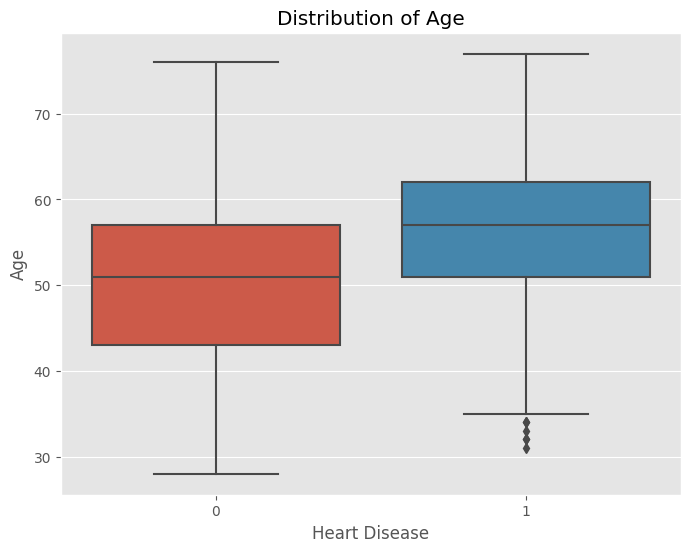

In [88]:
_ = plt.figure(figsize=(8, 6))
_ = sns.boxplot(data=df, y='Age', x='HeartDisease')
_ = plt.title('Distribution of Age')
_ = plt.xlabel('Heart Disease')
_ = plt.ylabel('Age')
_ = plt.show()

In [89]:
px.box(df, y="RestingBP", x="HeartDisease",
       title=f"Distribution of RestingBP", color="Sex")

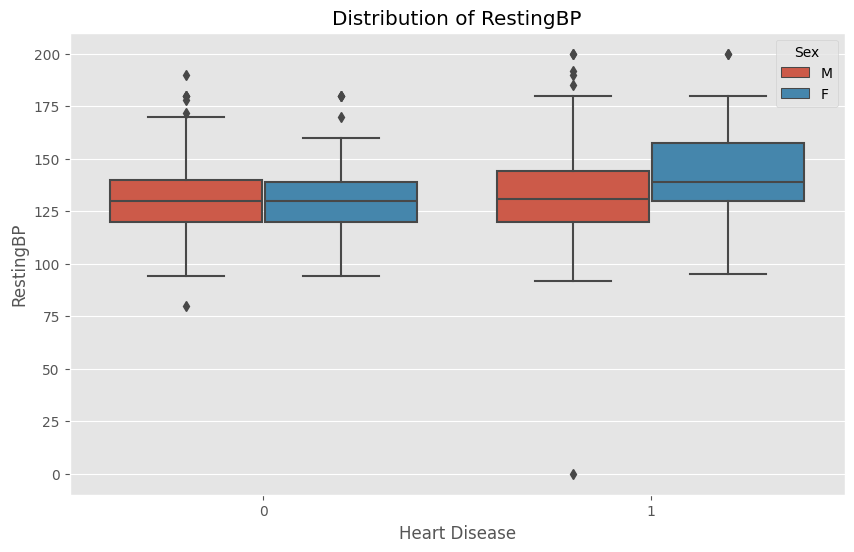

In [90]:
_ = plt.figure(figsize=(10, 6))
_ = sns.boxplot(data=df, x='HeartDisease', y='RestingBP', hue='Sex')
_ = plt.title('Distribution of RestingBP')
_ = plt.xlabel('Heart Disease')
_ = plt.ylabel('RestingBP')
_ = plt.legend(title='Sex')
_ = plt.show()

In [91]:
px.box(df, y="Cholesterol", x="HeartDisease",
       title=f"Distrubution of Cholesterol")

In [92]:
px.box(df, y="Oldpeak", x="HeartDisease", title=f"Distribution of Oldpeak")

In [93]:
px.box(df, y="MaxHR", x="HeartDisease", title=f"Distrubution of MaxHR")

# Data Preprocessing

## Handling Null Values

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [95]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Handling Categorical Variables

In [96]:
for col in df.select_dtypes('string').columns:
  print(f"The distribution of categorical values in the {col} is:")
  print(df[col].value_counts())
  print()

The distribution of categorical values in the Sex is:
Sex
M    725
F    193
Name: count, dtype: Int64

The distribution of categorical values in the ChestPainType is:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64

The distribution of categorical values in the RestingECG is:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64

The distribution of categorical values in the ExerciseAngina is:
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64

The distribution of categorical values in the ST_Slope is:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64



In [97]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [106]:
df_nontree = pd.get_dummies(
    df, columns=df.select_dtypes('string').columns, drop_first=False)

df_nontree

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [107]:
[len(df[col].value_counts()) for col in df.select_dtypes('string').columns]

df_nontree.columns

12+14-5

[2, 4, 3, 2, 3]

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

21

In [108]:
# Getting the target column at the end
target = "HeartDisease"
y = df_nontree[target].values
df_nontree.drop("HeartDisease", axis=1, inplace=True)
df_nontree = pd.concat([df_nontree, df[target]], axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


# Machine Learning Model

In [109]:
feature_col_nontree = df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [110]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [111]:
df_nontree.head()
y[:10]

df.shape
y.shape

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

(918, 12)

(918,)

In [112]:
# df_nontree = df_nontree.iloc[:, :-1]
# df_nontree

In [118]:
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
  X_train = df_nontree.loc[trn_, feature_col_nontree]
  y_train = df_nontree.loc[trn_, target]

  X_valid = df_nontree.loc[val_, feature_col_nontree]
  y_valid = df_nontree.loc[val_, target]

  scaler = MinMaxScaler()
  # scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_valid = scaler.transform(X_valid)

  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)

  print(f"The fold is {fold}: ")
  print(classification_report(y_valid, y_pred))

  acc = roc_auc_score(y_valid, y_pred)
  acc_log.append(acc)

  print(f"The accuracy for fold {fold}: {acc:.2%}")

LogisticRegression()

The fold is 0: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for fold 0: 88.01%


LogisticRegression()

The fold is 1: 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for fold 1: 85.32%


LogisticRegression()

The fold is 2: 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83       184
   macro avg       0.87      0.81      0.82       184
weighted avg       0.86      0.83      0.82       184

The accuracy for fold 2: 81.34%


LogisticRegression()

The fold is 3: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       101

    accuracy                           0.86       183
   macro avg       0.87      0.86      0.86       183
weighted avg       0.86      0.86      0.86       183

The accuracy for fold 3: 85.79%


LogisticRegression()

The fold is 4: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        82
           1       0.78      0.72      0.75       101

    accuracy                           0.74       183
   macro avg       0.74      0.74      0.74       183
weighted avg       0.74      0.74      0.74       183

The accuracy for fold 4: 73.94%


In [114]:
from sklearn.naive_bayes import GaussianNB

In [120]:
acc_Gauss = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (train, test) in enumerate(kf.split(X=df_nontree, y=y)):
  X_train = df_nontree.loc[train, feature_col_nontree]
  y_train = df_nontree.loc[train, target]

  X_test = df_nontree.loc[test, feature_col_nontree]
  y_test = df_nontree.loc[test, target]

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  clf = GaussianNB()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(f'The fold is {fold}:')
  print(classification_report(y_test, y_pred))

  acc = roc_auc_score(y_test, y_pred)
  acc_Gauss.append(acc)

  print(f'The accuracy for fold {fold} is: {acc:.2%}')

GaussianNB()

The fold is 0:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for fold 0 is: 86.05%


GaussianNB()

The fold is 1:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for fold 1 is: 88.38%


GaussianNB()

The fold is 2:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83       184
   macro avg       0.87      0.81      0.81       184
weighted avg       0.86      0.83      0.82       184

The accuracy for fold 2 is: 80.73%


GaussianNB()

The fold is 3:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.81      0.87      0.84       101

    accuracy                           0.82       183
   macro avg       0.82      0.81      0.82       183
weighted avg       0.82      0.82      0.82       183

The accuracy for fold 3 is: 81.37%


GaussianNB()

The fold is 4:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        82
           1       0.88      0.75      0.81       101

    accuracy                           0.81       183
   macro avg       0.81      0.82      0.81       183
weighted avg       0.82      0.81      0.81       183

The accuracy for fold 4 is: 81.53%


In [130]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


def svm_classification(kernel_type='linear'):
  acc_scores = []
  kf = StratifiedKFold(n_splits=5)

  for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    clf = SVC(kernel=kernel_type)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)

    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))

    acc = roc_auc_score(y_valid, y_pred)
    acc_scores.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

  print(f'{np.average(acc_scores):.2%}')


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  print(f"Kernel type: {kernel}")
  svm_classification(kernel_type=kernel)
  print('--------------------------------------')

Kernel type: linear
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy             